In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import readFile
from helper import oneHotEncoder
from NeuralNetwork import NeuralNetwork

%matplotlib inline

### Load data and One-Hot-Encode

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw2train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw2dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw2eval_labels.txt', './data/')

# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel, 9)
devLabel = oneHotEncoder(devLabel, 9)
evalLabel = oneHotEncoder(evalLabel, 9)

In [3]:
print(trainFeature.shape, devFeature.shape, evalFeature.shape)

(5060, 1120) (731, 1120) (909, 1120)


In [4]:
# Universial Hyper-parameters
batchSize = 300

### Relu non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.19444 s
Reach the maximum iteration	 446.49 s
At 461 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.454743083004
Development Accuracy:	 0.381668946648
Evaluation Accuracy:	 0.382838283828


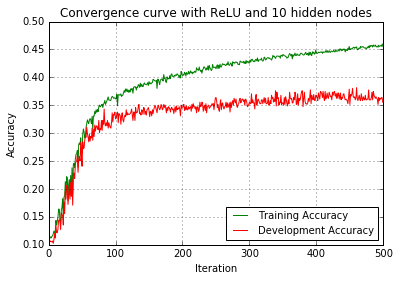

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.06866 s
Reach the maximum iteration	 493.13 s
At 494 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.369169960474
Development Accuracy:	 0.296853625171
Evaluation Accuracy:	 0.306930693069


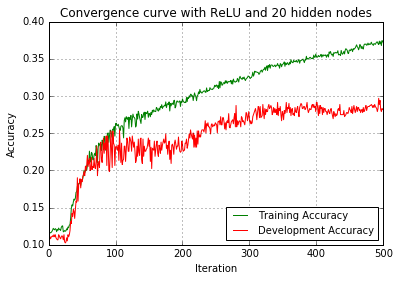

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.07927 s
Reach the maximum iteration	 523.78 s
At 436 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.598616600791
Development Accuracy:	 0.413132694938
Evaluation Accuracy:	 0.435643564356


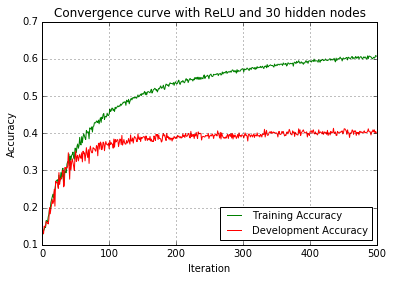

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.0221 s
Reach the maximum iteration	 484.18 s
At 376 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.481422924901
Development Accuracy:	 0.3707250342
Evaluation Accuracy:	 0.338833883388


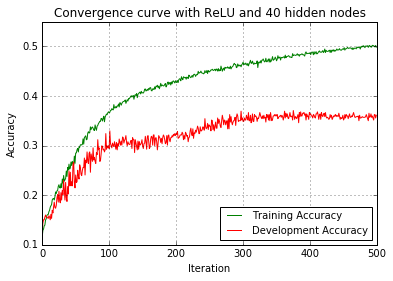

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.05415 s
Reach the maximum iteration	 364.96 s
At 478 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.460079051383
Development Accuracy:	 0.320109439124
Evaluation Accuracy:	 0.305830583058


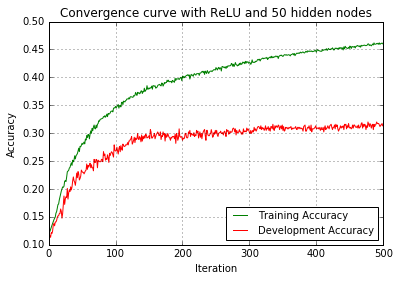

In [5]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.1, 0.1, 0.09, 0.08, 0.06]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='relu', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)
    
    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with ReLU and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Sigmoid non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.16664 s
Reach the maximum iteration	 914.63 s
At 410 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.493280632411
Development Accuracy:	 0.366621067031
Evaluation Accuracy:	 0.328932893289


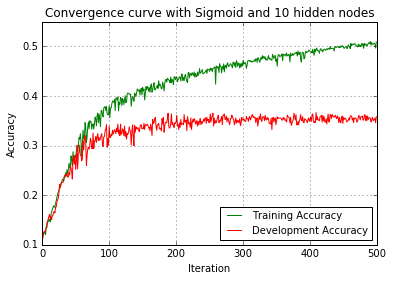

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.14012 s
Reach the maximum iteration	 904.56 s
At 144 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.506916996047
Development Accuracy:	 0.43365253078
Evaluation Accuracy:	 0.380638063806


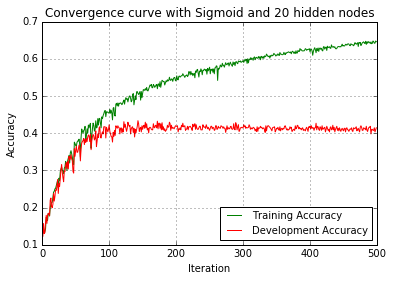

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.0727 s
Reach the maximum iteration	 947.11 s
At 286 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.658695652174
Development Accuracy:	 0.452804377565
Evaluation Accuracy:	 0.445544554455


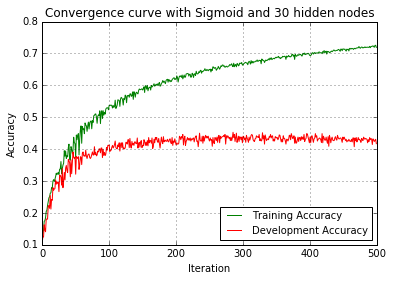

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.1177 s
Reach the maximum iteration	 1012.07 s
At 401 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.717786561265
Development Accuracy:	 0.439124487004
Evaluation Accuracy:	 0.393839383938


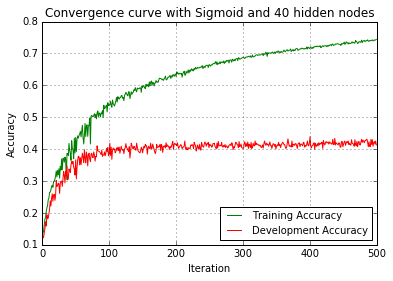

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.09262 s
Reach the maximum iteration	 1077.11 s
At 382 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.785770750988
Development Accuracy:	 0.485636114911
Evaluation Accuracy:	 0.411441144114


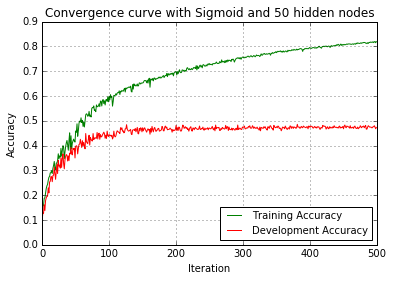

In [6]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)
    
    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='sigmoid', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Sigmoid and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### Tanh non-linearity

************************************************************
********************  Hidden node is 10 ********************
************************************************************
Used time for one iteration (single batch): 	 0.13473 s
Reach the maximum iteration	 334.18 s
At 224 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.550197628458
Development Accuracy:	 0.398084815321
Evaluation Accuracy:	 0.357535753575


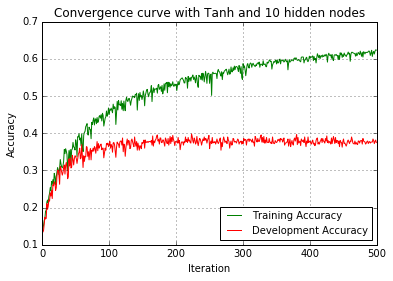

************************************************************
********************  Hidden node is 20 ********************
************************************************************
Used time for one iteration (single batch): 	 0.03429 s
Reach the maximum iteration	 527.73 s
At 156 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.570355731225
Development Accuracy:	 0.415868673051
Evaluation Accuracy:	 0.38503850385


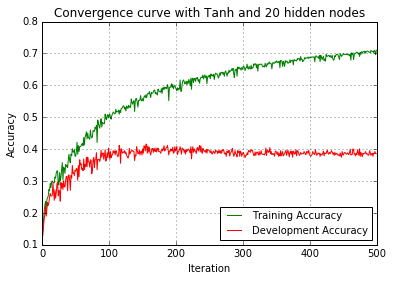

************************************************************
********************  Hidden node is 30 ********************
************************************************************
Used time for one iteration (single batch): 	 0.08287 s
Reach the maximum iteration	 534.55 s
At 278 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.714229249012
Development Accuracy:	 0.396716826265
Evaluation Accuracy:	 0.37403740374


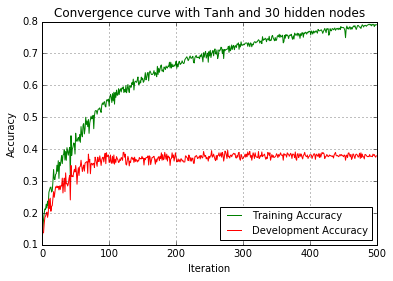

************************************************************
********************  Hidden node is 40 ********************
************************************************************
Used time for one iteration (single batch): 	 0.05141 s
Reach the maximum iteration	 744.18 s
At 127 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.678656126482
Development Accuracy:	 0.450068399453
Evaluation Accuracy:	 0.388338833883


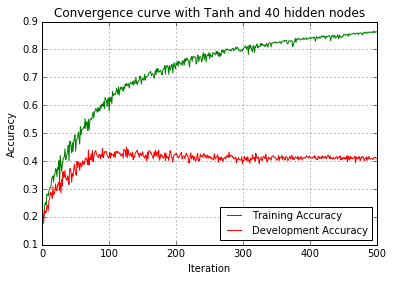

************************************************************
********************  Hidden node is 50 ********************
************************************************************
Used time for one iteration (single batch): 	 0.07501 s
Reach the maximum iteration	 666.53 s
At 153 th iteration, reach the maximum development accuracy
Training Accuracy:	 0.752766798419
Development Accuracy:	 0.428180574555
Evaluation Accuracy:	 0.391639163916


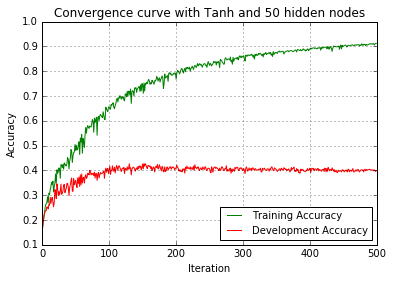

In [5]:
hiddenNodeList = [10, 20, 30, 40, 50]
learningRateList = [0.3, 0.3, 0.3, 0.3, 0.3]

for i in range(5):
    hidden = hiddenNodeList[i]
    learningRate = learningRateList[i]
    print('*' * 60)
    print('*' * 20, ' Hidden node is', hidden, '*' * 20)
    print('*' * 60)

    # create the Neural Network classifier
    nn = NeuralNetwork(netSize=(hidden, hidden, 9), loss='tanh', maxIter=500, 
                       batchSize=batchSize, learningRate=learningRate, CV=True)

    # train the model
    test = nn.train(trainFeature, trainLabel, devFeature, devLabel, showFreq=1000)
    # get the accuracy
    trainAcc, cvAcc, w = nn.getParams()
    # get the accuracy information
    index = np.argmax(cvAcc[50:]) + 50
    wBest = w[index]
    # get the evaluation accuracy
    testAcc = nn.evaluate(evalFeature, evalLabel, wBest)
    
    print('At', index + 1, 'th iteration, reach the maximum development accuracy')
    print('Training Accuracy:\t', trainAcc[index])
    print('Development Accuracy:\t', cvAcc[index])
    print('Evaluation Accuracy:\t', testAcc)

    # plot the training accuracy
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(trainAcc, 'g', label='Training Accuracy')
    ax.plot(cvAcc, 'r', label='Development Accuracy')
    ax.set_title('Convergence curve with Tanh and ' + str(hidden) + ' hidden nodes')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Accuracy')
    ax.legend(loc=4, fontsize=10)
    ax.grid('on')
    plt.show()

### TensorFlow

In [ ]:
#########################################################
# Part 2: TensorFlow Analysis
print('*' * 60)
print('Part 5: TensorFlow Analysis')